In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
hbarc=1.97e-7 #ev-m
rho = 1./1.e-15 ## nucleon/m
M=1.e9 #eV
### Box 17.2
Ev = hbarc**2*np.pi**2*rho**2/(96*M)

In [3]:
print(Ev/1.e6)

3.98989038751955


Text(0, 0.5, 'Binding Energy/Nucleon (MeV)')

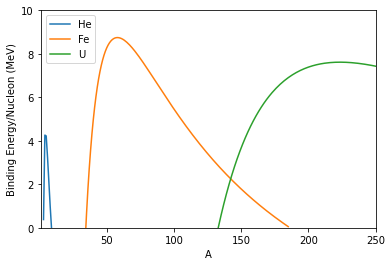

In [24]:
ev=15.56
es=17.23
ec=0.7
esym=23.28
def binding_energy(Z,N):
    A=Z+N
    B=ev*A-es*A**.6667 -ec*Z**2/A**.333-esym*(N-Z)**2/A
    ## pairing energy
    
    return B
Z=2.
N=np.arange(1.,160.,1.)
A=N+Z
plt.plot(A,binding_energy(Z,N)/(Z+N),label='He')
Z=26.
A=N+Z
plt.plot(A,binding_energy(Z,N)/(Z+N),label='Fe')
Z=92.
A=N+Z
plt.plot(A,binding_energy(Z,N)/(Z+N),label='U')
plt.legend()
plt.axis([1,250,.0,10])
plt.xlabel('A')
plt.ylabel('Binding Energy/Nucleon (MeV)')
#plt.xscale('log')

Text(0, 0.5, 'Binding Energy/Nucleon (MeV)')

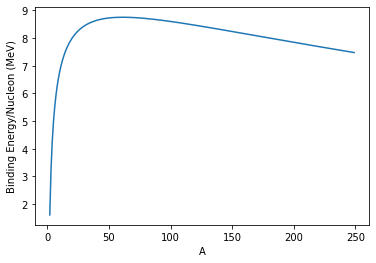

In [33]:
a=np.arange(2.,250.,1.)
zmin=.5*a/(1+.00752*a**.6667)
plt.plot(a,binding_energy(zmin,a-zmin)/a)
plt.xlabel('A')
plt.ylabel('Binding Energy/Nucleon (MeV)')

In [34]:
print(binding_energy(92,235-92),binding_energy(92,236-92))

1780.8228900204097 1786.812956390029
